1. explanation of when to use ML and when to not.

There are many different times you should use machine learning and when you shouldn't. Machine learning is using systems that can become better through experience and by using data. It can also be defined as "predictive modeling". A model is built on training data, which is used so it can then be used with real data. These models helps to make decisions. They can be used to automate tasks, like recognizing if emails are spam or not. Machine learning can be used to predict a lot of data. In order for it to predict this data, it has to have a lot of data to rely on. What it does is recognize patterns among the data. If you're giving it an insufficient amount of data, it's results could be unreliable because the small training data might be skewed one way or the other. In that case, you'll just want to program your own way to figure the data out. Even if you do have a large dataset to work with, it could take a lot of tweaking in order for the machine learning to really work. When deciding if you are going to use machine learning or not, you'll also want to look at what you're really trying to do. Machine learning will give you results, but because of how it works, it doesn't have the 'why'. Machine learning is also a really good tool to use if you're working with images or videos. This is much easier to train a model to recognize certain things than to actually hardcode it. 

# 2. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
import math
import seaborn as sns

In [3]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This is standardization

In [4]:
# Standardizing Name Column

titanic_df[['Last Name', 'First Name']] = titanic_df['Name'].str.split(',', expand=True)

In [5]:
# Standardizing Embarking to Numbers

embark_map = {'S':1,'C':2,'Q':3}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embark_map)
titanic_df
# print(embark_map)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0,Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0,Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0,Behr,Mr. Karl Howell


One hot encoding (separating the genders into two columns, with true and false)

In [6]:
gender_df = pd.get_dummies(titanic_df[['Sex']])
titanic_df = pd.concat([titanic_df, gender_df], axis=1)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,Braund,Mr. Owen Harris,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,Heikkinen,Miss. Laina,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,Allen,Mr. William Henry,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0,Montvila,Rev. Juozas,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0,Graham,Miss. Margaret Edith,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,Johnston,"Miss. Catherine Helen ""Carrie""",True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0,Behr,Mr. Karl Howell,False,True


Cleaning up Null Values (NaN)

In [7]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

# 3. Correlation Matrix

In [11]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Last Name       object
First Name      object
Sex_female        bool
Sex_male          bool
dtype: object

In [12]:
titanic_corr_df = titanic_df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked','Sex_female','Sex_male']].copy()

In [13]:
titanic_corr_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.108669,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.043835,-0.131900,0.131900
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.007165,-0.081163,0.081163
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.060606,0.114631,-0.114631
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.079320,0.245489,-0.245489
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.063462,0.182333,-0.182333
Embarked,0.108669,0.043835,-0.007165,-0.060606,-0.079320,0.063462,1.000000,0.118593,-0.118593
Sex_female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.118593,1.000000,-1.000000
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.118593,-1.000000,1.000000


<Axes: >

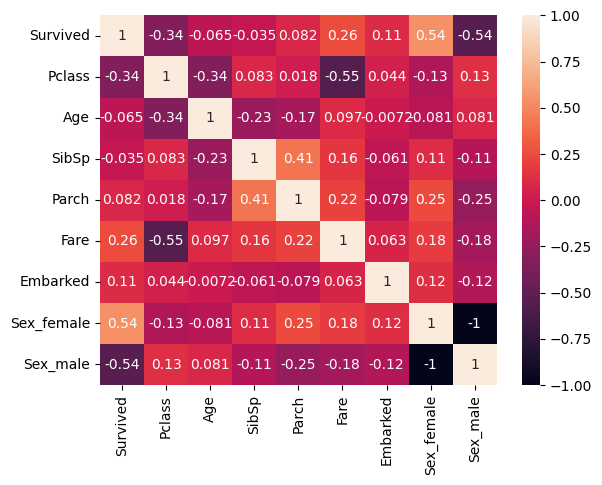

In [14]:
sns.heatmap(titanic_corr_df.corr(), annot=True)

This is showing correlation throughout the dataframe. It uses who survived, their passenger class, age, sibling and spouse amount, parents and children amount, fare price, where they embarked, and if they're male or female. Some correlations can be seen like .54 for the females who survived. This makes sense because women and children were let off first. There aren't too many other correlations of note. The parents and children have a .41 correlation with sibling and spouse, which makes sense. Those with parents or children on board probably have a spouse on board as well. 

# 4.

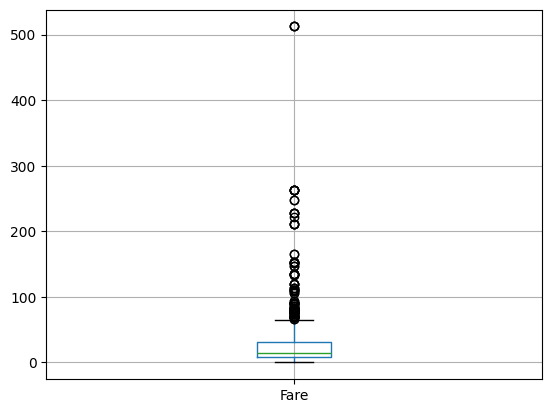

In [15]:
# box and whisker plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

boxplot = titanic_df.boxplot(column = ['Fare'], return_type='axes')

# This column doesn't have any null values, so I didn't have to account for that

What this shows us is that the median is low, but there are still a large amount of people who
spent around 75 dollars are more on their ticket. This number increases to around 275, with
the exception of one person who spent over 500 dollars on a ticket.

# 5.

In [16]:
# Age Bins through binning

import time
time1 = time.perf_counter()
age_bins = [0,12,19,64, 100]
age_labels = ['Children','Teens','Adults','Seniors']
age_bins = pd.cut(titanic_df['Age'], age_bins, labels=age_labels)
titanic_df.insert(6, "Age_Bins", age_bins)
time2 = time.perf_counter()
print(time2 - time1)
titanic_df.head()

0.0048946000169962645


,PassengerId,Survived,Pclass,Name,Sex,Age,Age_Bins,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,Adults,1,0,A/5 21171,7.2500,Unknown,1.0,Braund,Mr. Owen Harris,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adults,1,0,PC 17599,71.2833,C85,2.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,Adults,0,0,STON/O2. 3101282,7.9250,Unknown,1.0,Heikkinen,Miss. Laina,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adults,1,0,113803,53.1000,C123,1.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,Adults,0,0,373450,8.0500,Unknown,1.0,Allen,Mr. William Henry,False,True


In [28]:
# Age bins through lambda
time_lambda1 = time.perf_counter()
age_bins_df = titanic_df['Age'].apply(lambda x: 'Children' if x <= 12 else 'Teens' if x <= 19 else 'Adults' if x <= 64 else 'Seniors')
# titanic_df.insert(6, "Age_Bins", age_bins)
time_lambda2 = time.perf_counter()
# print(time_lambda2 - time_lambda1)

This shows that making a new column separating the ages is faster to do using a lambda than with binning. It's very minimally quicker, but it's still noticeable.

# 6.

In [26]:
children_df = titanic_df.loc[titanic_df['Age_Bins'] == 'Children']
teen_df = titanic_df.loc[titanic_df['Age_Bins'] == 'Teens']
adults_df = titanic_df.loc[titanic_df['Age_Bins'] == 'Adults']
seniors_df = titanic_df.loc[titanic_df['Age_Bins'] == 'Seniors']

(array([5., 0., 1., 1., 1., 0., 1., 0., 1., 1.]),
 array([ 7.75 , 14.075, 20.4  , 26.725, 33.05 , 39.375, 45.7  , 52.025,
        58.35 , 64.675, 71.   ]),
 <BarContainer object of 10 artists>)

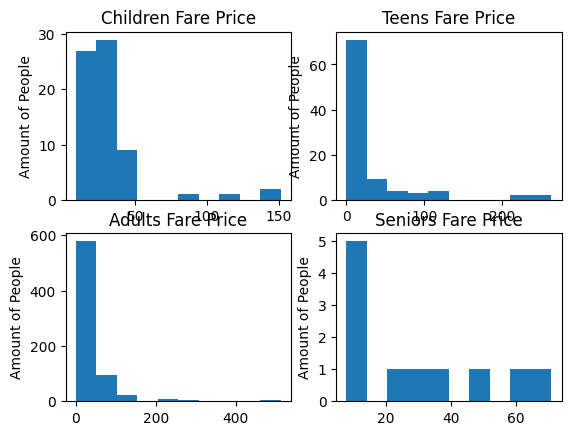

In [25]:
x = children_df['Fare']
plt.subplot(2,2,1)
plt.ylabel('Amount of People')
plt.title('Children Fare Price')
plt.hist(x)
x = teen_df['Fare']
plt.subplot(2,2,2)
plt.ylabel('Amount of People')
plt.title('Teens Fare Price')
plt.hist(x)
x = adults_df['Fare']
plt.subplot(2,2,3)
plt.ylabel('Amount of People')
plt.title('Adults Fare Price')
plt.hist(x)
x = seniors_df['Fare']
plt.subplot(2,2,4)
plt.ylabel('Amount of People')
plt.title('Seniors Fare Price')
plt.hist(x)

What this shows is that the children primarily were less than 50 dollars per ticket. The teens had
very cheap tickets. The adults also had pretty cheap tickets, but not as much. The seniors also primarily paid very little, with 5 seniors spending around 10-15 dollars for one. There are some outliers in each where people spent a lot of money on tickets. This can especially be seen in teens with a ticket for over two hundred dollars, and the adults had one for around 500 dollars.